Question 1

51
100
105
256


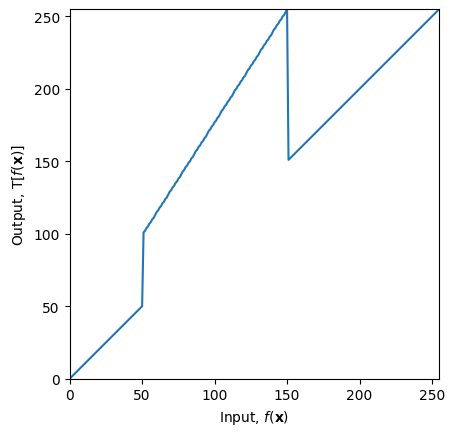

In [16]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


c = np.array([(50,50),(50,100),(150,255), (150,150)])  

t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')  
print(len(t1))

t2 = np.linspace(c[1,1] + 1 , 255, c[2,0] - c[1,0]).astype('uint8') 
print(len(t2))

t3 = np.linspace(c[3,1] + 1 , 255, 255 - c[2,0]).astype('uint8') 
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
# plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()


img_orig = cv.imread('Images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()





Question 2 1) Finding out the intensity histogram

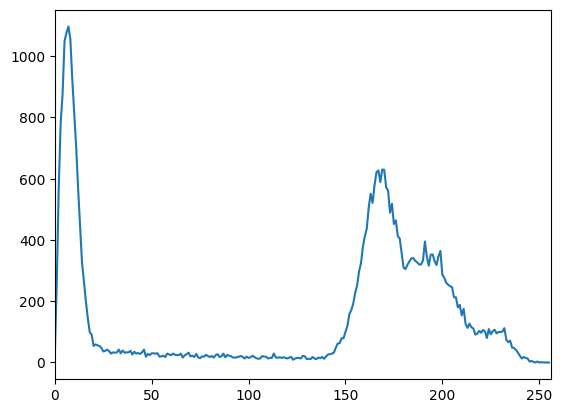

In [21]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv . imread ( 'Images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE )
hist = cv.calcHist([img], [0], None, [256], [0,256])
# img: This is the input image for which you want to calculate the histogram.
# [0]: This parameter specifies which channel of the image you want to compute the histogram for. In this case, 0 refers to the first channel, typically representing the intensity of grayscale values in the image.
# None: This is the mask. You can provide a mask image if you want to calculate the histogram only for specific regions of the input image. In this case, since None is used, the entire image is considered.
# [256]: This parameter defines the number of bins in the histogram. In this case, there are 256 bins, which corresponds to the range of possible grayscale values (0 to 255).
# [0, 256]: This defines the range of values for the histogram bins. The range [0, 256] covers all possible grayscale intensity values.
plt.plot(hist)
plt.xlim([0 , 256])
plt.show( )




Gray Matter

256


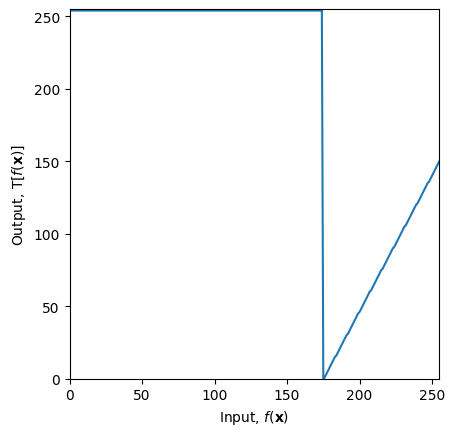

In [4]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'Images/BrainProtonDensitySlice9.png'  # Replace with the actual path to your image
proton_density_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # Load as grayscale

t1 = np.linspace(254,255, 175).astype('uint8')
t2 = np.linspace(0,150, 255 - 174).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
# plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()

img_orig = cv.imread('Images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()




White Matter

256


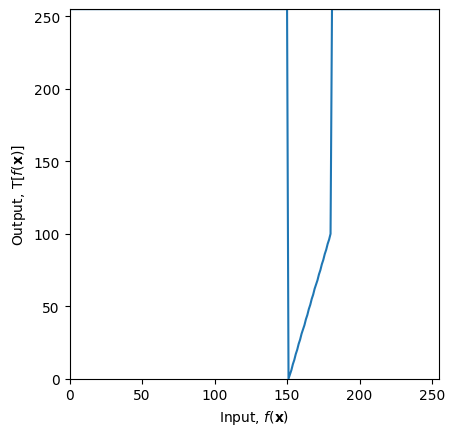

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'Images/BrainProtonDensitySlice9.png'  # Replace with the actual path to your image
proton_density_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # Load as grayscale

t1 = np.linspace(255,255, 151).astype('uint8')
t2 = np.linspace(0,100, 30).astype('uint8')
t3 = np.linspace(255,255, 255- 180).astype('uint8')


transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
# plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()

img_orig = cv.imread('Images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


Question 3 | Applying l correction to lab space

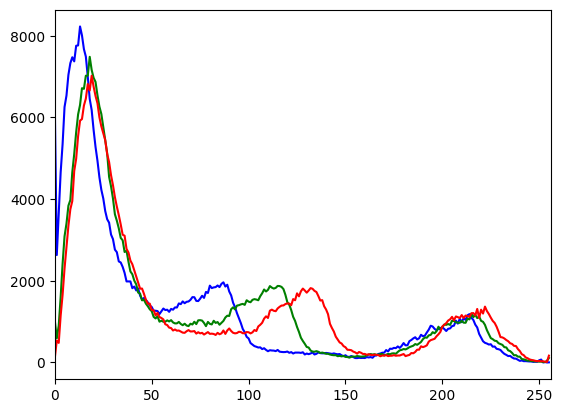

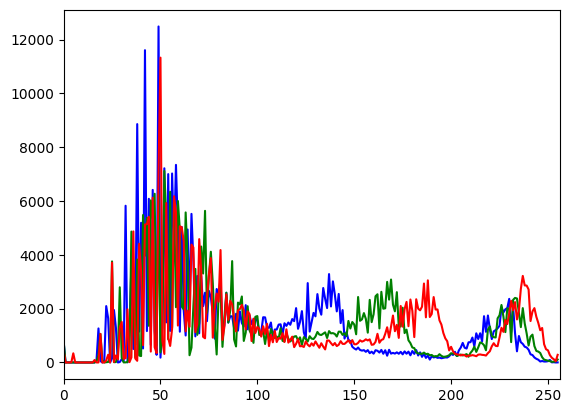

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5

f = cv.imread('Images/highlights_and_shadows.jpg')

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', f)
cv.waitKey(0)

# Convert the image to Lab color space
lab_image = cv.cvtColor(f, cv.COLOR_BGR2Lab)

# Split the Lab image into channels
l_channel, a_channel, b_channel = cv.split(lab_image)

#apply gamma for l plane
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
f_gamma = cv.LUT(l_channel, t)

# Merge the channels back into a Lab image
lab_image = cv.merge((f_gamma, a_channel, b_channel))

# Convert the image to bgr
lab_image = cv.cvtColor(lab_image, cv.COLOR_Lab2BGR)


cv.imshow('Image', lab_image)
cv.waitKey(0)
cv.destroyAllWindows()

color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([f], [i], None, [256], [0,256])
    plt.plot (hist, color = c)
    plt.xlim([0,256])
plt.show( )

color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([lab_image], [i], None, [256], [0,256])
    plt.plot (hist, color = c)
    plt.xlim([0,256])
plt.show( )



Question 4

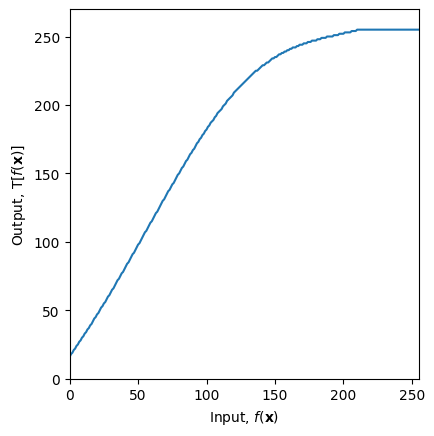

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

a = 0.7
f = cv.imread('Images/spider.png')

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', f)
cv.waitKey(0)

# Convert the image to HSV color space
lab_image = cv.cvtColor(f, cv.COLOR_BGR2HSV)

# Split the HSV image into channels
hue, saturation, value = cv.split(lab_image)

#apply transformation for saturation plane
t = np.array([min(i+a*128*math.exp(-1*((i-128)**2)/(2*70**2)), 255) for i in np.arange(0,256)]).astype(np.uint8)
f_saturation = cv.LUT(saturation, t)

# Merge the channels back into a Lab image
lab_image = cv.merge((hue, f_saturation, value))

# Convert the image to bgr
lab_image = cv.cvtColor(lab_image, cv.COLOR_HSV2BGR)


cv.imshow('Image', lab_image)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,270)
ax.set_aspect('equal') 
# plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()

Question 5

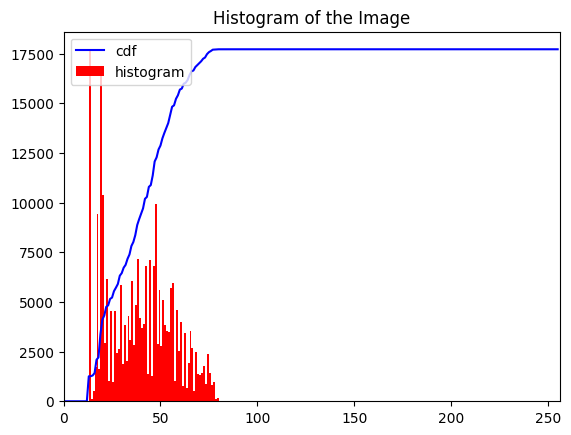

250000


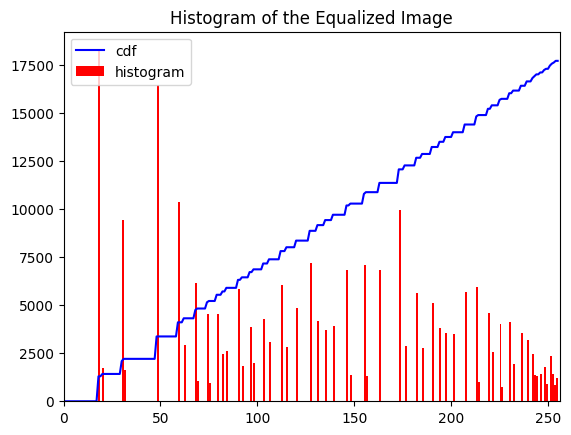

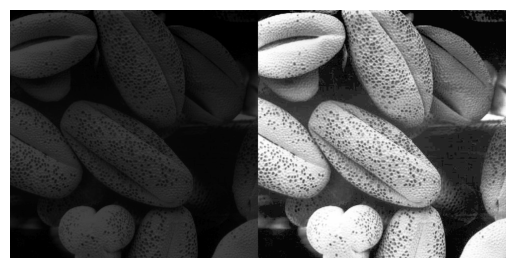

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

hist, bins =np.histogram(img.ravel(), 256, [0,256]) # bins means x axis elemenets
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256],  color  = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Image')
plt.show()

L = 256
MN = cdf[L-1]
print(MN)

transform = np.array([(L-1) * cdf[i]/ MN for i in np.arange(0,256)]).astype(np.uint8)
img_c = cv.LUT(img, transform)

hist_c, bins =np.histogram(img_c.ravel(), 256, [0,256]) # bins means x axis elemenets
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c*hist.max()/cdf_c.max()
plt.plot(cdf_c_normalized, color = 'b')
plt.hist(img_c.flatten(), 256, [0,256],  color  = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,img_c))
plt.axis('off')
plt.imshow(res, cmap='gray')

Question 6

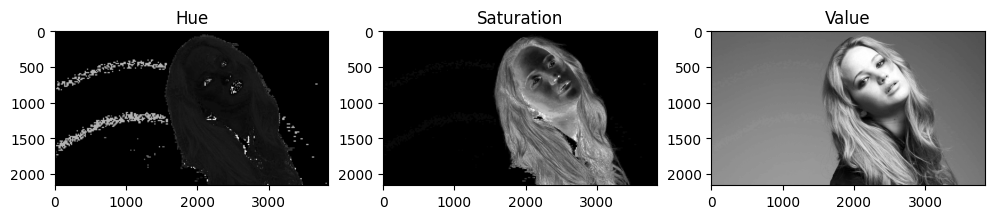

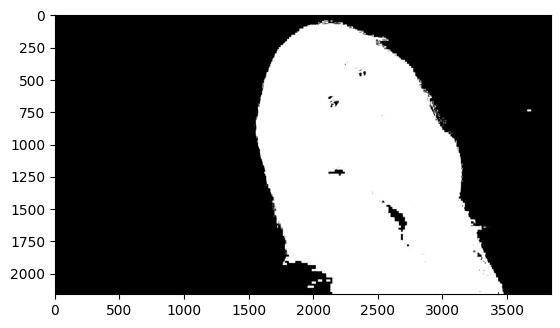

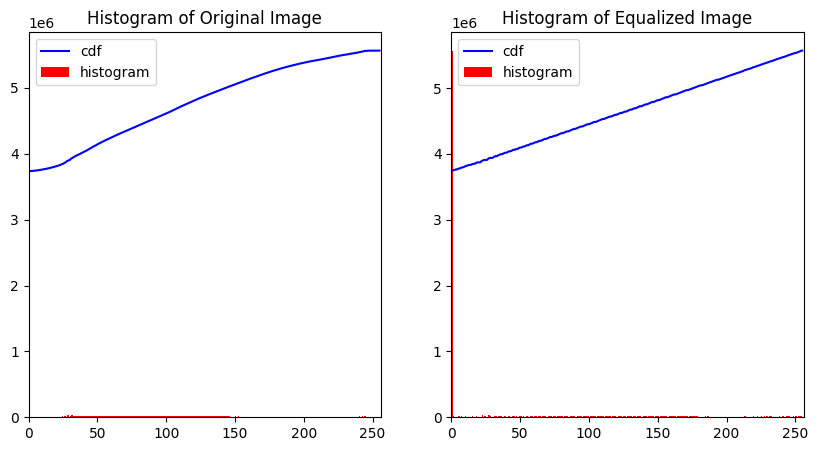

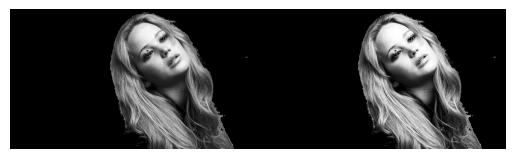

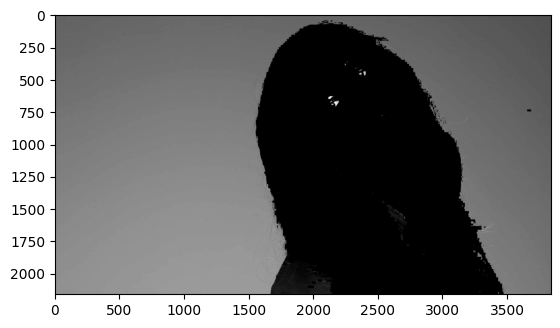

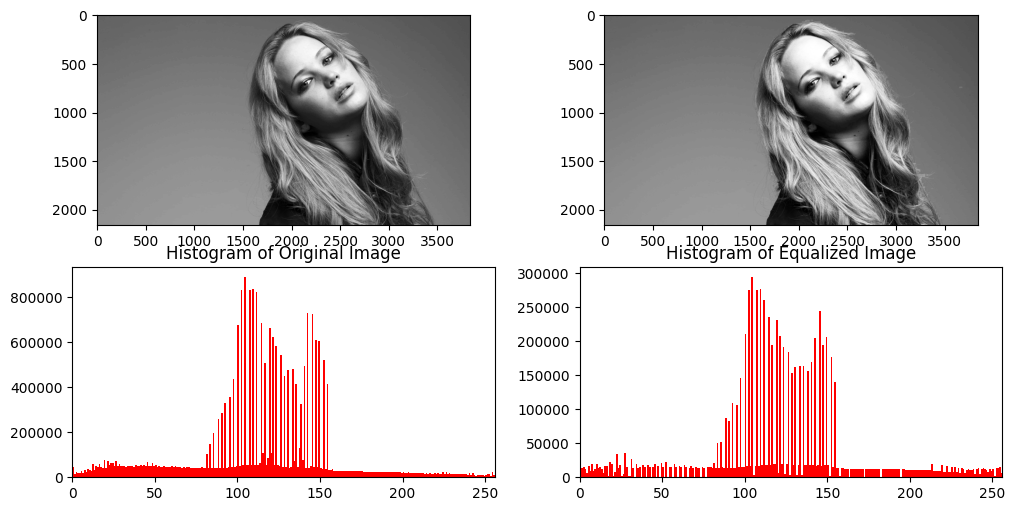

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

f = cv.imread('Images/jeniffer.jpg')

# Convert the image to HSV color space
lab_image = cv.cvtColor(f, cv.COLOR_BGR2HSV)

# Split the HSV image into channels
hue, saturation, value = cv.split(lab_image)


plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.show()

# Threshold the saturation plane to extract the foreground mask
_, foreground_mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)

# Visulaize the mask
fig,ax=plt.subplots()
ax.imshow(foreground_mask,cmap="gray")
plt.show()


# Apply the mask to obtain the foreground
foreground = cv.bitwise_and(f, f, mask=foreground_mask)

# Convert the foreground to grayscale for histogram calculation
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

#Creating Histograms
hist,bins = np.histogram(foreground_gray.ravel(),256,[0,256])
cdf_a = hist.cumsum()
cdf_a_normalized = cdf_a * hist.max()/ cdf_a.max()


# Histogram Equalization
equ = cv.equalizeHist(foreground_gray)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf_b = hist.cumsum()
cdf_b_normalized = cdf_b * hist.max()/ cdf_b.max()

# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdf_a_normalized, color = 'b')
ax[0].hist(foreground_gray.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdf_b_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

 #before equalization and after equalization

res=np.hstack((foreground_gray,equ))
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()


# Extract the background
gray_image = cv.cvtColor(f,cv.COLOR_BGR2GRAY)
background_image = gray_image - foreground_gray

# Bacqkground

fig,ax=plt.subplots()
ax.imshow(background_image,cmap="gray")
plt.show()

# Add the backgorund to the equalized foreground
final_image = background_image + equ


# Corrected image

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(f, cv.COLOR_BGR2GRAY),cmap = "gray")
ax[0,1].imshow(final_image,cmap = "gray")


ax[1,0].hist(f.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
ax[1,0].set_title("Histogram of Original Image")

ax[1,1].hist(final_image.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
ax[1,1].set_title("Histogram of Equalized Image")

plt.show()

Question 7 a

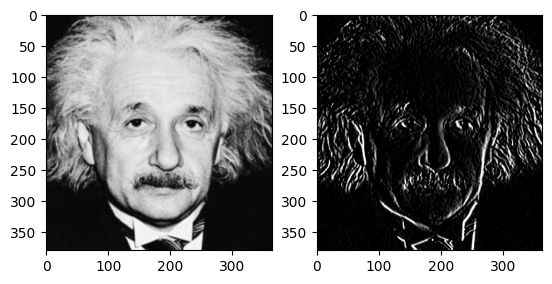

In [19]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'Images/einstein.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

# Apply Sobel filters using filter2D
sobel_result = cv.filter2D(image, -1, kernel1)

# Convert the filtered images back to uint8
sobel_result = cv.convertScaleAbs(sobel_result)

# Visualize the image
 
fig,ax = plt.subplots(1,2)

ax[0].imshow(image,cmap='gray')
ax[1].imshow(sobel_result,cmap='gray')

plt.show()

Question 7 b

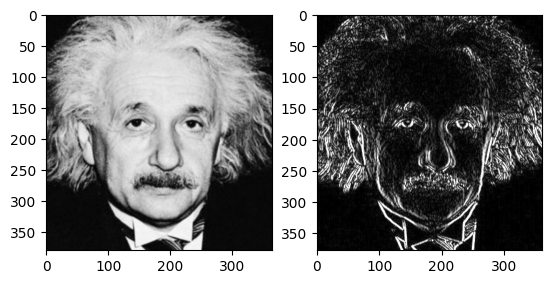

In [35]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'Images/einstein.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

sobel_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

# Get dimensions of the image and filter
image_height, image_width = image.shape
filter_size = sobel_filter.shape[0]

# Initialize an output image array
sobel_result = np.zeros((image_height - filter_size + 1, image_width - filter_size + 1), dtype=np.float32)

# Apply the Sobel filter
for y in range(image_height - filter_size + 1):
    for x in range(image_width - filter_size + 1):
        sobel_result[y, x] = np.sum(image[y:y+filter_size, x:x+filter_size] * sobel_filter)

# Convert the filtered image to uint8
sobel_result = cv.convertScaleAbs(sobel_result)

# Visualize the image
 
fig,ax = plt.subplots(1,2)

ax[0].imshow(image,cmap='gray')
ax[1].imshow(sobel_result,cmap='gray')

plt.show()


Question 7 c

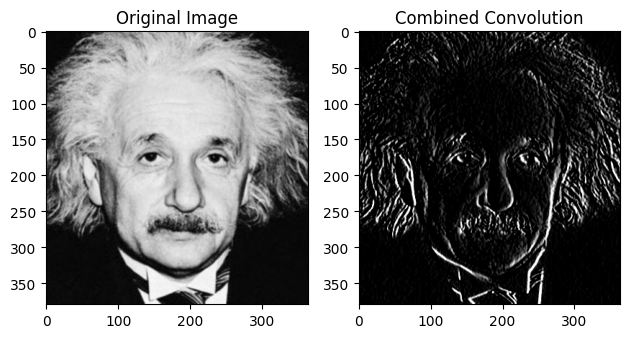

In [37]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'Images/einstein.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Defining the kernels
kernel1 = np.array([[1], [2], [1]])
kernel2 = np.array([[1, 0, -1]])

# Applying the convolutions
kernel = kernel1 * kernel2
conv = cv.filter2D(image, -1, kernel)

# Visualize the image

fig, ax = plt.subplots(1, 2,)

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(conv, cmap='gray')
ax[1].set_title('Combined Convolution')

plt.tight_layout()
plt.show()

Question 8

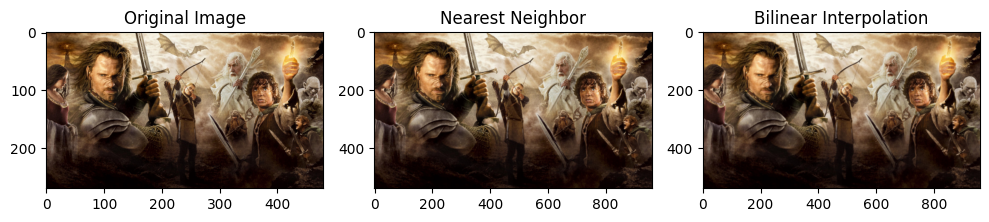

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread('Images/zooming/im01small.png')
assert img is not None, 'Image not found'

def zoom_nearest_neighbor(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = int(i / factor)
            orig_j = int(j / factor)
            zoomed_image[i, j] = image[orig_i, orig_j]
    
    return zoomed_image


def zoom_bilinear(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = i / factor
            orig_j = j / factor
            
            i1, i2 = int(np.floor(orig_i)), int(np.ceil(orig_i))
            j1, j2 = int(np.floor(orig_j)), int(np.ceil(orig_j))
            
            i1 = max(0, min(i1, h - 1))  # Ensure indices stay within image boundaries
            i2 = max(0, min(i2, h - 1))
            j1 = max(0, min(j1, w - 1))
            j2 = max(0, min(j2, w - 1))
            
            # Bilinear interpolation
            value = (1 - (orig_i - i1)) * (1 - (orig_j - j1)) * image[i1, j1] + \
                    (1 - (orig_i - i1)) * (orig_j - j1) * image[i1, j2] + \
                    (orig_i - i1) * (1 - (orig_j - j1)) * image[i2, j1] + \
                    (orig_i - i1) * (orig_j - j1) * image[i2, j2]
            
            zoomed_image[i, j] = value.astype(np.uint8)
    
    return zoomed_image


# Zoom factor
zoom_factor = 2  # Change this to the desired zoom factor

# Zoom using nearest-neighbor
zoomed_nn = zoom_nearest_neighbor(img, zoom_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(img, zoom_factor)

# Visualize the images
cv.namedWindow('Original Image', cv.WINDOW_AUTOSIZE)
cv.namedWindow('Nearest Neighbor', cv.WINDOW_AUTOSIZE)
cv.namedWindow('Bilinear Interpolation', cv.WINDOW_AUTOSIZE)

cv.imshow('Original Image', img)
cv.imshow('Nearest Neighbor', zoomed_nn)
cv.imshow('Bilinear Interpolation', zoomed_bilinear)

cv.waitKey(0)
cv.destroyAllWindows()

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
plt.title('Nearest Neighbor')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation')

plt.tight_layout()
plt.show()


In [26]:
small_image = cv.imread('Images/zooming/im03small.png')
original_image = cv.imread('Images/zooming/im03.png')

# Zoom factor
scale_factor = 4.0

scaled_nn = zoom_nearest_neighbor(small_image, scale_factor)
scaled_bilinear = zoom_bilinear(small_image, scale_factor)

ssd_nn = np.sum((scaled_nn - original_image)**2)
ssd_bilinear = np.sum((scaled_bilinear - original_image)**2)

# Normalize the SSD values
normalized_ssd_nn = ssd_nn / (original_image.shape[0] * original_image.shape[1])
normalized_ssd_bilinear = ssd_bilinear / (original_image.shape[0] * original_image.shape[1])

# Print the normalized SSD values
print(f"Normalized SSD (Nearest Neighbor): {normalized_ssd_nn}")
print(f"Normalized SSD (Bilinear Interpolation): {normalized_ssd_bilinear}")

Normalized SSD (Nearest Neighbor): 35.706039930555555
Normalized SSD (Bilinear Interpolation): 48.63532986111111


Question 9

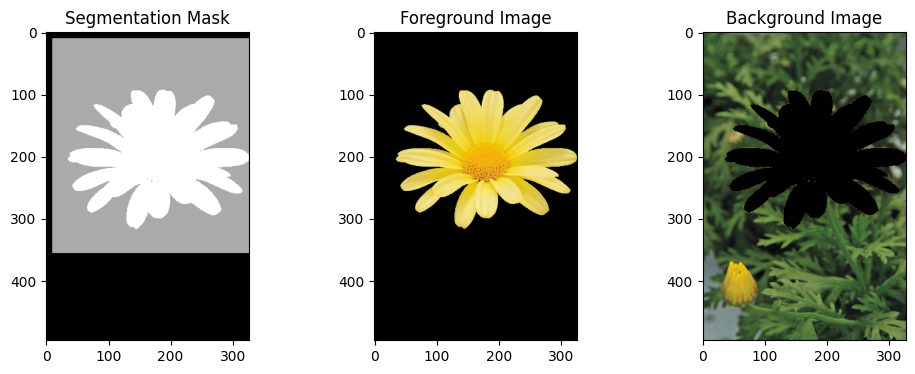

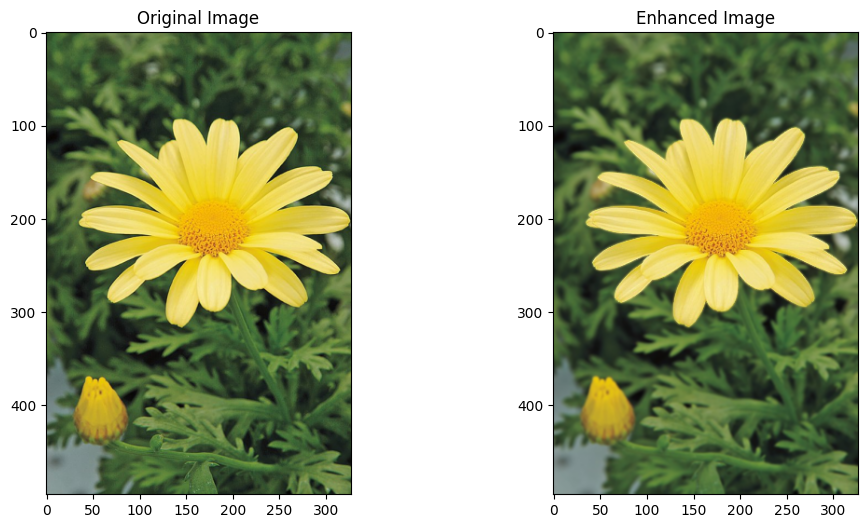

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/flower.PNG"  # Replace with the path to your image
image = cv.imread(image_path)

# Create an empty mask for GrabCut
mask = np.zeros(image.shape[:2], np.uint8)

# Define the region of interest (ROI) for GrabCut
rect = (10, 10, image.shape[1] - 10, image.shape[0] - 150)  # Format: (x, y, width, height)

# Initialize the background and foreground models for GrabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run the GrabCut algorithm
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create segmentation masks for foreground and background
foreground_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
background_mask = 1 - foreground_mask

# Apply the masks to the original image
foreground_image = image * foreground_mask[:, :, np.newaxis]
background_image = image * background_mask[:, :, np.newaxis]

# change the color to RGB
foreground_image = cv.cvtColor(foreground_image,cv.COLOR_BGR2RGB)
background_image = cv.cvtColor(background_image,cv.COLOR_BGR2RGB)


# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(mask, cmap='gray'), plt.title('Segmentation Mask')
plt.subplot(132), plt.imshow(foreground_image), plt.title('Foreground Image')
plt.subplot(133), plt.imshow(background_image), plt.title('Background Image')
plt.show()

# Create a blurred background by applying a Gaussian blur
background = cv.GaussianBlur(image, (0, 0), 1)  # blur level at 5


# Combine the foreground and blurred background
enhanced_image = (image * foreground_mask[:, :, np.newaxis] + background * background_mask[:, :, np.newaxis]).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)), plt.title('Enhanced Image')
plt.show()
